# Common Option Strategies

We continue to use our mini-quant library here.

In [1]:
import datetime
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
S_space = np.linspace(50, 150, 100)

In [3]:
def d1(S, T, K, r, vol):
    return (np.log(S/K) + (r+vol**2/2)*T)/vol/np.sqrt(T)

def d2(S, T, K, r, vol):
    return d1(S, T, K, r, vol) - vol*np.sqrt(T)

In [4]:
def call_price(S, T, K, r, vol):
    if T==0:
        return max(S-K, 0)
    else:
        return S*st.norm.cdf(d1(S, T, K, r, vol)) - K*np.exp(-r*T)*st.norm.cdf(d2(S, T, K, r, vol))
    
def put_price(S, T, K, r, vol):
    if T==0:
        return max(K-S, 0)
    else:
        return K*np.exp(-r*T)*st.norm.cdf(-d2(S, T, K, r, vol)) - S*st.norm.cdf(-d1(S, T, K, r, vol))

In [5]:
def call_delta(S, T, K, r, vol):
    return st.norm.cdf(d1(S, T, K, r, vol))

def put_delta(S, T, K, r, vol):
    return -st.norm.cdf(-d1(S, T, K, r, vol))

In [6]:
def gamma(S, T, K, r, vol):
    return st.norm.pdf(d1(S, T, K, r, vol))/S/vol/np.sqrt(T)

In [7]:
def vega(S, T, K, r, vol):
    return S*st.norm.pdf(d1(S, T, K, r, vol))*np.sqrt(T)

In [8]:
def call_theta(S, T, K, r, vol):
    return -S*st.norm.pdf(d1(S, T, K, r, vol))*vol/2/np.sqrt(T) - r*K*np.exp(-r*T)*st.norm.cdf(d2(S,T,K,r,vol))
    
def put_theta(S, T, K, r, vol):
    return -S*st.norm.pdf(d1(S, T, K, r, vol))*vol/2/np.sqrt(T) + r*K*np.exp(-r*T)*st.norm.cdf(-d2(S,T,K,r,vol))

In [9]:
def call_rho(S, T, K, r, vol):
    return K*T*np.exp(-r*T)*st.norm.cdf(d2(S, T, K, r, vol))

def put_rho(S, T, K, r, vol):
    return -K*T*np.exp(-r*T)*st.norm.cdf(-d2(S, T, K, r, vol))

In [10]:
def long_stock(S, K):
    return S - K

def short_stock(S, K):
    return K - S

## Enhancing Returns and Reducing Risk

Questions to consider:
- Is buying calls more or less bullish than buying stock?
- Which is more bullish? ATM calls or OTM calls?

In [11]:
ATM_call_price = call_price(S=100, T=1, K=100, r=0.02, vol=0.3)
OTM_call_price = call_price(S=100, T=1, K=120, r=0.02, vol=0.3)
ATM_call_price, OTM_call_price

(12.82158139269142, 5.9975721916531235)

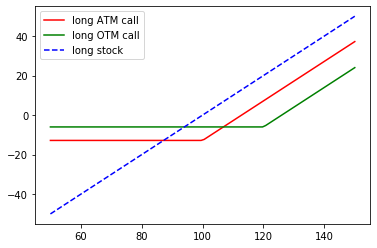

In [12]:
plt.plot(S_space, [call_price(S, T=0, K=100, r=0.02, vol=0.3) - ATM_call_price for S in S_space], color='red', label='long ATM call')
plt.plot(S_space, [call_price(S, T=0, K=120, r=0.02, vol=0.3) - OTM_call_price for S in S_space], color='green', label='long OTM call')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

Calls become less defensive the more **leverage** is used.

Leverage can be increased by buying multiple options.

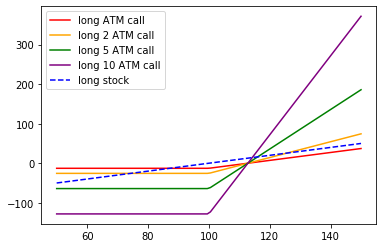

In [13]:
plt.plot(S_space, [call_price(S, T=0, K=100, r=0.02, vol=0.3) - ATM_call_price for S in S_space], color='red', label='long ATM call')
plt.plot(S_space, [(call_price(S, T=0, K=100, r=0.02, vol=0.3) - ATM_call_price)*2 for S in S_space], color='orange', label='long 2 ATM call')
plt.plot(S_space, [(call_price(S, T=0, K=100, r=0.02, vol=0.3) - ATM_call_price)*5 for S in S_space], color='green', label='long 5 ATM call')
plt.plot(S_space, [(call_price(S, T=0, K=100, r=0.02, vol=0.3) - ATM_call_price)*10 for S in S_space], color='purple', label='long 10 ATM call')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

Leverage can also be increased by buying OTM options.

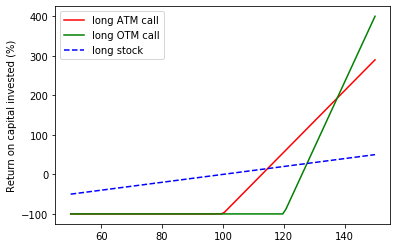

In [14]:
plt.plot(S_space, [(call_price(S, T=0, K=100, r=0.02, vol=0.3) - ATM_call_price)/ATM_call_price * 100 for S in S_space], color='red', label='long ATM call')
plt.plot(S_space, [(call_price(S, T=0, K=120, r=0.02, vol=0.3) - OTM_call_price)/OTM_call_price * 100 for S in S_space], color='green', label='long OTM call')
plt.plot(S_space, [S-100 for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()
_ = plt.ylabel('Return on capital invested (%)')

**Return enhancement and risk reduction**

- Return Enhancement
    - **Selling covered calls** at target sales levels enhances the selling price of the stock held in the portfolio whether it is called away or the premium is simply retained.
    - **Selling puts** at target purchase levels obligates the fund to purchase the stock while reducing the purchase price.


- Risk Reduction
    - **Buying collars** (sell call, buy put) offers protection against a market decline while maintaining limited upside appreciation
    - **Buying calls instead of buying stock** limits downside risk on the investment to the premium paid.
    - **Buying puts** protects the stock in case of downward movement in stock price.

### Call overwrite (buy stock + sell call)

- Get paid for committing today to sell stock at a higher price
- Enhance the yield on stocks where a portfolio manager sees limited upside potential in the short-term or where the PM has a specific sell target.
- Collect premium
- Underperform in a rally

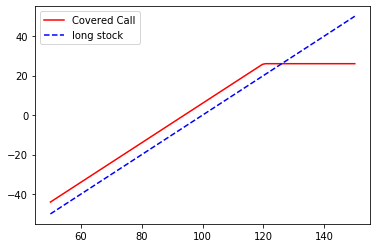

In [15]:
plt.plot(S_space, [long_stock(S, K=100) - call_price(S, T=0, K=120, r=0.02, vol=0.3) + OTM_call_price for S in S_space], color='red', label='Covered Call')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

### Sell Puts

- Naked Short Put
    - Commit to buy stock if it drops to a particular level. 
    - Like to own stock but not at current valuations. 
    - Caps upside potential in return for premium.
    
- 'I'd be a seller at better levels.'
- Short put as an overlay
    - Boost upside returns but double up downside losses.

In [16]:
OTM_put_price = put_price(S=100, T=1, K=80, r=0.02, vol=0.3)

In [17]:
OTM_put_price

3.1140372333370614

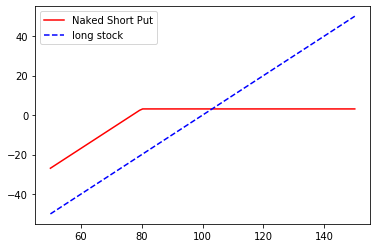

In [18]:
plt.plot(S_space, [-put_price(S, T=0, K=80, r=0.02, vol=0.3) + OTM_put_price for S in S_space], color='red', label='Naked Short Put')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

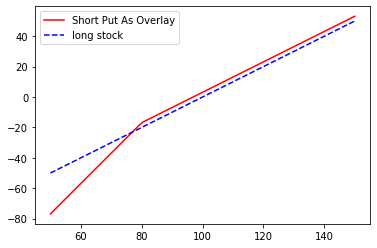

In [19]:
plt.plot(S_space, [long_stock(S, K=100)-put_price(S, T=0, K=80, r=0.02, vol=0.3) + OTM_put_price for S in S_space], color='red', label='Short Put As Overlay')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

### Buying Puts

- Spend some premium to hedge downside risk while maintaining upside exposure
- Act as a disaster protection or insurance.
- Limits downside exposure
- Risk losing 100% of premium paid, underperforming on the upside

In [20]:
ATM_put_price = put_price(S=100, T=1, K=100, r=0.02, vol=0.3)

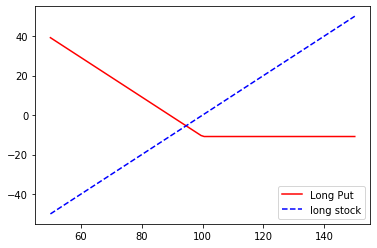

In [21]:
plt.plot(S_space, [put_price(S, T=0, K=100, r=0.02, vol=0.3) - ATM_put_price for S in S_space], color='red', label='Long Put')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

Remember Put call Parity? Stock + Put = Call

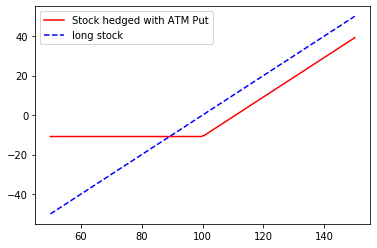

In [22]:
plt.plot(S_space, [long_stock(S, K=100) + put_price(S, T=0, K=100, r=0.02, vol=0.3) - ATM_put_price for S in S_space], color='red', label='Stock hedged with ATM Put')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

### Buying Put Spreads

What if you think buying put is expensive? You can sell another lower strike put.

- Hedge limited downside risk. Reduce the amount of premium spent relative to a protective put by selling out some of the downside protection.
- Limited downside exposure, cheaper than outright put.
- Risk losing 100% of premium paid. Downside protection limited to the difference in the two strikes.

In [23]:
ATM_put_price

10.841448723366952

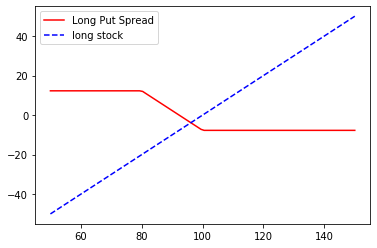

In [24]:
plt.plot(S_space, [put_price(S, T=0, K=100, r=0.02, vol=0.3) - put_price(S, T=0, K=80, r=0.02, vol=0.3)\
                   - (ATM_put_price-OTM_put_price) for S in S_space], color='red', label='Long Put Spread')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

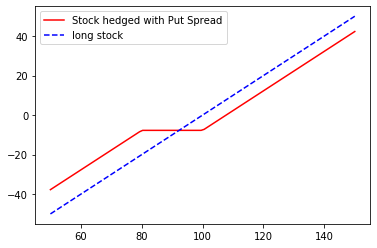

In [25]:
plt.plot(S_space, [long_stock(S, K=100) + put_price(S, T=0, K=100, r=0.02, vol=0.3) \
                   - put_price(S, T=0, K=80, r=0.02, vol=0.3) - (ATM_put_price-OTM_put_price)\
                   for S in S_space], color='red', label='Stock hedged with Put Spread')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

What does the Gamma and Vega of a Put Spread position look like?

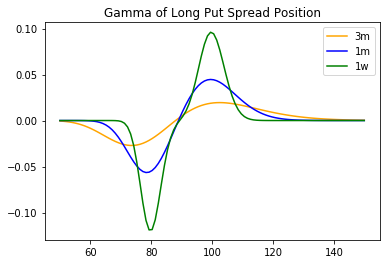

In [26]:
plt.plot(S_space, [gamma(S, T=1/4, K=100, r=0.02, vol=0.3) - gamma(S, T=1/4, K=80, r=0.02, vol=0.3)
                   for S in S_space], color='orange', label='3m')
plt.plot(S_space, [gamma(S, T=1/12, K=100, r=0.02, vol=0.3) - gamma(S, T=1/12, K=80, r=0.02, vol=0.3)
                   for S in S_space], color='blue', label='1m')
plt.plot(S_space, [gamma(S, T=1/52, K=100, r=0.02, vol=0.3) - gamma(S, T=1/52, K=80, r=0.02, vol=0.3)
                   for S in S_space], color='green', label='1w')
plt.title('Gamma of Long Put Spread Position')
_ = plt.legend()

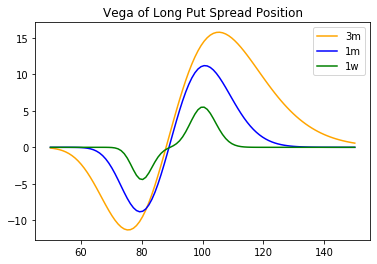

In [27]:
plt.plot(S_space, [vega(S, T=1/4, K=100, r=0.02, vol=0.3) - vega(S, T=1/4, K=80, r=0.02, vol=0.3)
                   for S in S_space], color='orange', label='3m')
plt.plot(S_space, [vega(S, T=1/12, K=100, r=0.02, vol=0.3) - vega(S, T=1/12, K=80, r=0.02, vol=0.3)
                   for S in S_space], color='blue', label='1m')
plt.plot(S_space, [vega(S, T=1/52, K=100, r=0.02, vol=0.3) - vega(S, T=1/52, K=80, r=0.02, vol=0.3)
                   for S in S_space], color='green', label='1w')
plt.title('Vega of Long Put Spread Position')
_ = plt.legend()

### Buying a collar

Another way to reduce the premium paid on a put is to sell an OTM call.
- Reduces volatility of returns: lock in gains without selling the stock and covers near-term uncertainty.
- Hedges downside risk where a portfolio manager sees limited upside and/or is prepared to forego upside potential.
- Limits downside exposure, but underperforms in a rally.
- Typically close to zero cost (zero-cost collar). Downside protection paid for by giving up upside.

In [28]:
OTM_put_price  # strike = 80

3.1140372333370614

In [29]:
OTM_call_price  # strike = 120. Premium too high. Can we find a call strike that matches the OTM put price?

5.9975721916531235

In [30]:
def find_zero_collar_call_strike(OTM_put_price):
    min_K = 100
    max_K = 200
    K = (min_K + max_K)/2
    threshold = 0.001
    OTM_call_price = call_price(S=100, T=1, K=K, r=0.02, vol=0.3)
    while abs(OTM_call_price-OTM_put_price) > threshold:
        if OTM_call_price > OTM_put_price:
            min_K = K
        else:
            max_K = K
        K = (max_K + min_K)/2
        OTM_call_price = call_price(S=100, T=1, K=K, r=0.02, vol=0.3)
    return K

In [31]:
strike_call_z = find_zero_collar_call_strike(OTM_put_price)

In [32]:
OTM_call_price_z = call_price(S=100, T=1, K=strike_call_z, r=0.02, vol=0.3)

In [33]:
strike_call_z, OTM_call_price_z

(135.90087890625, 3.1136313757204803)

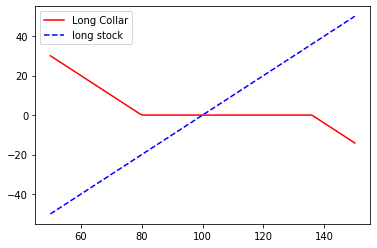

In [34]:
plt.plot(S_space, [put_price(S, T=0, K=80, r=0.02, vol=0.3) - call_price(S, T=0, K=strike_call_z, r=0.02, vol=0.3)\
                   - (OTM_put_price-OTM_call_price_z) for S in S_space], color='red', label='Long Collar')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

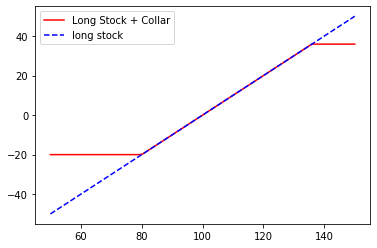

In [35]:
plt.plot(S_space, [long_stock(S, K=100 ) + put_price(S, T=0, K=80, r=0.02, vol=0.3) - call_price(S, T=0, K=strike_call_z, r=0.02, vol=0.3)\
                   - (OTM_put_price-OTM_call_price_z) for S in S_space], color='red', label='Long Stock + Collar')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

### Other strategies

**Buy a Straddle**
- Long call and put at the same strike.
- Expect large stock moves (e.g. earnings, court rulings)
- Makes money if stock price moves enough.
- Higher implied vol -> higher straddle price -> wider breakevens

In [36]:
ATM_put_price_50 = put_price(S=100, T=1, K=100, r=0.02, vol=0.5)
ATM_call_price_50 = call_price(S=100, T=1, K=100, r=0.02, vol=0.5)

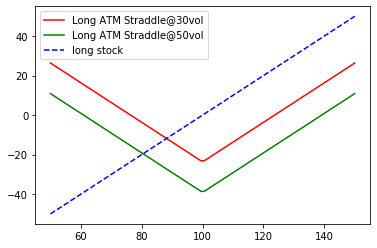

In [37]:
plt.plot(S_space, [put_price(S, T=0, K=100, r=0.02, vol=0.3) + call_price(S, T=0, K=100, r=0.02, vol=0.3)\
                   - (ATM_put_price+ATM_call_price) for S in S_space], color='red', label='Long ATM Straddle@30vol')
plt.plot(S_space, [put_price(S, T=0, K=100, r=0.02, vol=0.5) + call_price(S, T=0, K=100, r=0.02, vol=0.50)\
                   - (ATM_put_price_50+ATM_call_price_50) for S in S_space], color='green', label='Long ATM Straddle@50vol')
plt.plot(S_space, [long_stock(S, K=100) for S in S_space], '--', color='blue', label='long stock')
_ = plt.legend()

**Vega and Gamma of Straddle**

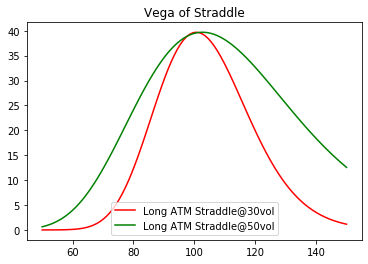

In [45]:
plt.plot(S_space, [vega(S, T=1/4, K=100, r=0.02, vol=0.3) + vega(S, T=1/4, K=100, r=0.02, vol=0.3)
                   for S in S_space], color='red', label='Long ATM Straddle@30vol')
plt.plot(S_space, [vega(S, T=1/4, K=100, r=0.02, vol=0.5) + vega(S, T=1/4, K=100, r=0.02, vol=0.50)
                    for S in S_space], color='green', label='Long ATM Straddle@50vol')
plt.title('Vega of Straddle')
_ = plt.legend()

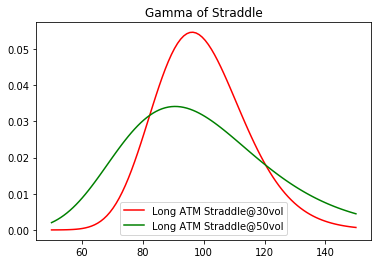

In [47]:
plt.plot(S_space, [gamma(S, T=1/4, K=100, r=0.02, vol=0.3) + gamma(S, T=1/4, K=100, r=0.02, vol=0.3)
                   for S in S_space], color='red', label='Long ATM Straddle@30vol')
plt.plot(S_space, [gamma(S, T=1/4, K=100, r=0.02, vol=0.5) + gamma(S, T=1/4, K=100, r=0.02, vol=0.50)
                   for S in S_space], color='green', label='Long ATM Straddle@50vol')
plt.title('Gamma of Straddle')
_ = plt.legend()

**Buy a Strangle**
- Long call and put at different strikes
- Cheaper than a straddle
- Bigger stock move required to make money (i.e. even wider breakevens than straddle)
- Higher implied vol -> higher strangle price -> higher breakevens

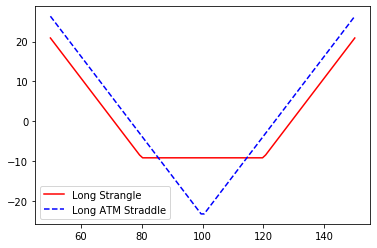

In [40]:
plt.plot(S_space, [put_price(S, T=0, K=80, r=0.02, vol=0.3) + call_price(S, T=0, K=120, r=0.02, vol=0.3)\
                   - (OTM_put_price+OTM_call_price) for S in S_space], color='red', label='Long Strangle')
plt.plot(S_space, [put_price(S, T=0, K=100, r=0.02, vol=0.3) + call_price(S, T=0, K=100, r=0.02, vol=0.3)\
                   - (ATM_put_price+ATM_call_price) for S in S_space], '--', color='blue', label='Long ATM Straddle')
_ = plt.legend()

**Vega and Gamma of A Strangle**

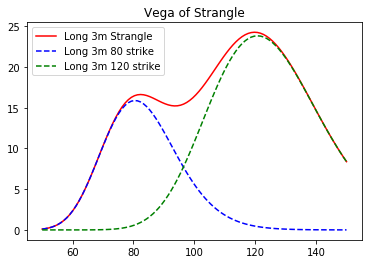

In [41]:
plt.plot(S_space, [vega(S, T=1/4, K=80, r=0.02, vol=0.3) + vega(S, T=1/4, K=120, r=0.02, vol=0.3)
                   for S in S_space], color='red', label='Long 3m Strangle')
plt.plot(S_space, [vega(S, T=1/4, K=80, r=0.02, vol=0.3)
                   for S in S_space], '--', color='blue', label='Long 3m 80 strike')
plt.plot(S_space, [vega(S, T=1/4, K=120, r=0.02, vol=0.3)
                   for S in S_space], '--', color='green', label='Long 3m 120 strike')
plt.title('Vega of Strangle')
_ = plt.legend()

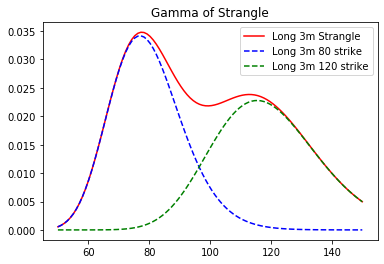

In [42]:
plt.plot(S_space, [gamma(S, T=1/4, K=80, r=0.02, vol=0.3) + gamma(S, T=1/4, K=120, r=0.02, vol=0.3)
                   for S in S_space], color='red', label='Long 3m Strangle')
plt.plot(S_space, [gamma(S, T=1/4, K=80, r=0.02, vol=0.3)
                   for S in S_space], '--', color='blue', label='Long 3m 80 strike')
plt.plot(S_space, [gamma(S, T=1/4, K=120, r=0.02, vol=0.3)
                   for S in S_space], '--', color='green', label='Long 3m 120 strike')
plt.title('Gamma of Strangle')
_ = plt.legend()

Both straddles and strangles are bets on how much the market moves instead of its direction, aka Trading Volatility.

For ATM straddles ($S=K$), we know from the black-scholes formula that:
$C = SN(d_1)-Ke^{-rT}N(d_2) = S(N(d_1)-N(d_2)) \approx SN'(d_1)(d_1-d_2) = S\dfrac{1}{\sqrt{2\pi}}e^{-\dfrac{d_1^2}{2}} \sigma \sqrt{T}$. 

Since $d_1 = \dfrac{ln(S/K) + (r-q+\sigma^2/2)/T}{\sigma\sqrt{T}} \approx 0$, we can estimate the price of an ATM call as roughly $\dfrac{1}{\sqrt{2\pi}}S\sigma\sqrt{T}\approx 0.4S\sigma\sqrt{T}$.

Similarly, we can see that this estimate is the same for ATM puts, and that the price of an ATM straddle is roughly $0.8S\sigma\sqrt{T}$. From the formula we see an obvious exposure to implied volatility.

**Butterfly Spread**

Why Butterfly?

- If you want to buy vol but don't want to pay too much, you can buy a put spread + a call spread instead of buying a put + a call;
- If you want to sell vol but don't want to short too much *tail risk*, you can sell a put spread + a call spread instead of selling a put + a call;

- **Short Butterfly**
    - Sell one call at $K_1$
    - Buy two calls at $K_2$
    - Sell one call at $K_3$
    
- **Long Butterfly**
    - Buy one call at $K_1$
    - Sell two calls at $K_2$
    - Buy one call at $K_3$
    
In both cases, $K_2 = (K_1+K_3)/2$

The above is equivalent to the put spread + call spread composition (+/- some constant). (Try to prove it yourself).

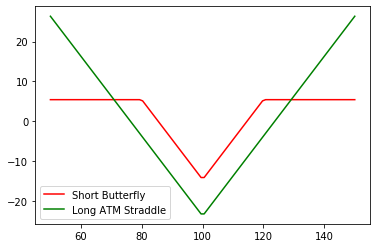

In [43]:
plt.plot(S_space, [put_price(S, T=0, K=100, r=0.02, vol=0.3) + call_price(S, T=0, K=100, r=0.02, vol=0.3)\
                   - put_price(S, T=0, K=80, r=0.02, vol=0.3) - call_price(S, T=0, K=120, r=0.02, vol=0.3)\
                   - (ATM_put_price+ATM_call_price-OTM_put_price-OTM_call_price) for S in S_space], color='red', label='Short Butterfly')
plt.plot(S_space, [put_price(S, T=0, K=100, r=0.02, vol=0.5) + call_price(S, T=0, K=100, r=0.02, vol=0.3)\
                   - (ATM_put_price+ATM_call_price) for S in S_space], color='green', label='Long ATM Straddle')
_ = plt.legend()

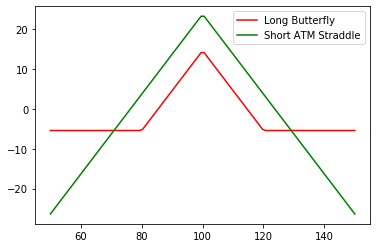

In [44]:
plt.plot(S_space, [-put_price(S, T=0, K=100, r=0.02, vol=0.3) - call_price(S, T=0, K=100, r=0.02, vol=0.3)\
                   + put_price(S, T=0, K=80, r=0.02, vol=0.3) + call_price(S, T=0, K=120, r=0.02, vol=0.3)\
                   + (ATM_put_price+ATM_call_price-OTM_put_price-OTM_call_price) for S in S_space], color='red', label='Long Butterfly')
plt.plot(S_space, [-put_price(S, T=0, K=100, r=0.02, vol=0.5) - call_price(S, T=0, K=100, r=0.02, vol=0.3)\
                   + (ATM_put_price+ATM_call_price) for S in S_space], color='green', label='Short ATM Straddle')
_ = plt.legend()

**Calendar Spread**

- Buy a calendar
    - Short an option with a shorter time to maturity
    - Long an option with a longer time to maturity

- Can be a call calendar or a Put Calendar.
- Betting on the term structure of volatility

## Pricing options under event risk and non-constant volatility

**An example: annualized volatility over 34 business days**

Suppose we have 33 days of 25.5% 'regular' volatility and 1 'event' day with very high volatility, say 100%. What is the volatility over the whole 34 days?

Variance, not volatility, is linear with time. (Recall the properties of a Brownian Motion.)

$\text{Term variance} / 34 = ((25.5\%)^2 \times 33 + (100\%)^2 \times 1) / 34$ = 0.0925

$\text{Term volatility} = \sqrt{0.0925} = 30.4\%$

We mentioned the earnings calendar in previous lectures:
- Earnings Calendar
    - https://markets.businessinsider.com/earnings-calendar

Let's pick Walmart (WMT) as an example. There's an earnings coming up on Nov 14, 2019. Let's look at the implied vol of WMT options on yahoo finance. (You can also check it from other sources, e.g. Bloomberg).

We see at the end of day Nov 8, 2019:
- WMT 120 strike, Nov 15, 2019 call option implied vol is around 37.5%
- WMT 120 strike, Nov 22, 2019 call, option implied vol is around 28.5%

What does that mean?

(Assuming zero vol on weekends)

- The Nov 15 expiry option covers 1 event day and 4 regular days.
- The Nov 22 expiry option covers 1 event day and 9 regular days.

So $(37.5\%)^2 \times 5 = \sigma_e^2 + 4\sigma_r^2, (28.5\%)^2 \times 10 = \sigma_e^2 + 9\sigma_r^2 \implies \sigma_e = 78.47\%, \sigma_r = 14.77\%$.

An annualized vol of 78.47% implies an earnings day move of 4.94%. 

Therefore, if you believe WMT stock is going to move more (less) than 4.94% (whether up or down), you can long (short) options and delta-hedge them to capture the difference between implied and realized vol.